In [1]:
import sklearn
import pandas as pd
import numpy as np
import datetime

In [2]:
from IPython.display import HTML
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


In [3]:
import holoviews as hv
%load_ext holoviews.ipython
%output holomap='widgets'

In [4]:
%matplotlib inline

In [5]:
RMSE_baseline = 1929245.11374

In [6]:
pred_100 = 4453532.6
pred_075 = 3340149.4499999997
pred_050 = 2226766.3
pred_125 = 5566915.75

In [7]:
pred_dict = {1.00: pred_100,
             0.75: pred_075,
             0.50: pred_050,
             1.25: pred_125}

In [8]:
n_pub = 96

In [9]:
sublog = pd.read_csv('../submission_log.tsv', delimiter='\t')

In [10]:
sublog

,RMSE,factor,uid1,uid2,label
0,1929245.11374,1.00,None,None,baseline
1,1918277.94518,0.75,-2679,-2244,1st youngest and rarest
2,1933235.98790,0.50,-2679,None,1st youngest
3,1929245.11374,0.75,-84446,-6212,2nd youngest and 1st oldest
4,1929245.11374,0.75,-29949,-11153,3rd youngest and 2nd oldest
5,1930481.41222,0.75,-2134,-2141,"4th youngest, 3rd oldest"
6,1934693.87604,1.25,None,-2141,3rd oldest only
7,1927046.20844,0.75,-20626,-3482,5th youngest and 4th oldest
8,1931541.59395,0.50,-20626,None,5th youngest
9,1942908.27493,0.75,-34091,-50168,6th youngest and 5th oldest


In [11]:
st = '-20626'
li = np.any(np.concatenate((
            np.expand_dims(sublog['uid1'].values==st,1),
            np.expand_dims(sublog['uid2'].values==st,1)
        ),axis=1),axis=1)

In [12]:
li.shape

(86,)

In [13]:
factors = sublog[li]['factor'].values
y = sublog[li]['RMSE'].values

In [14]:
x = np.array([pred_dict[f] for f in factors])
print(x)
print(y)

[ 3340149.45  2226766.3 ]
[ 1927046.20844  1931541.59395]


In [15]:
x = np.append(x, pred_100)
y = np.append(y, RMSE_baseline)

In [16]:
print(x)
print(y)

[ 3340149.45  2226766.3   4453532.6 ]
[ 1927046.20844  1931541.59395  1929245.11374]


Let

y := RMSE_LB

x := revenue_predicted

We want to fit the curve

y^2 = ( c + (x-x0)^2 )/n

where

x0 is the revenue_actual

n is the number of datapoints used for the leaderboard score

c is the squared error of all n-1 other datapoints

This is the same as fitting

n.y^2 = x^2 - 2.x0.x + (x0^2 + c)

Since we already know x^2

n.y^2 - x^2 = - 2.x0.x + (x0^2 + c)

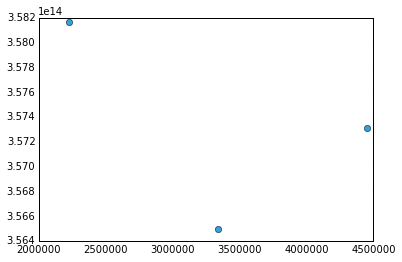

In [17]:
plt.plot(x,y**2*n_pub,'o')

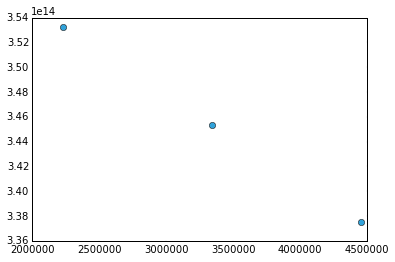

In [18]:
plt.plot(x,y**2*n_pub-x**2,'o')

In [19]:
z = np.polyfit(x, y**2*n_pub, 2)

In [20]:
z

array([  9.99999999e-01,  -7.06253800e+06,   3.68930015e+14])

In [21]:
z = np.polyfit(x, y**2*n_pub-x**2, 1)

In [22]:
z

array([ -7.06253800e+06,   3.68930015e+14])

In [23]:
-0.5 * z[0]

3531268.9998708637

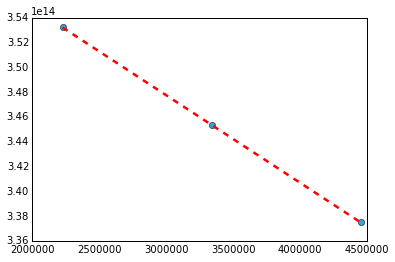

In [24]:
p = np.poly1d(z)
plt.plot(x,y**2*n_pub-x**2,'o')
xx = np.linspace(x.min(), x.max(), num=1000)
plt.plot(xx,p(xx),'--',color='r')

In [25]:
sublog

,RMSE,factor,uid1,uid2,label
0,1929245.11374,1.00,None,None,baseline
1,1918277.94518,0.75,-2679,-2244,1st youngest and rarest
2,1933235.98790,0.50,-2679,None,1st youngest
3,1929245.11374,0.75,-84446,-6212,2nd youngest and 1st oldest
4,1929245.11374,0.75,-29949,-11153,3rd youngest and 2nd oldest
5,1930481.41222,0.75,-2134,-2141,"4th youngest, 3rd oldest"
6,1934693.87604,1.25,None,-2141,3rd oldest only
7,1927046.20844,0.75,-20626,-3482,5th youngest and 4th oldest
8,1931541.59395,0.50,-20626,None,5th youngest
9,1942908.27493,0.75,-34091,-50168,6th youngest and 5th oldest


In [26]:
all_uids = np.union1d(sublog['uid1'].values, sublog['uid2'].values)
print(all_uids)

['-10340' '-11153' '-12114' '-12177' '-1218' '-13389' '-13480' '-13863'
 '-13993' '-16052' '-1695' '-17314' '-1769' '-17785' '-18041' '-19786'
 '-20626' '-2134' '-2141' '-22033' '-22417' '-2244' '-23421' '-2421'
 '-24305' '-25615' '-26474' '-2660' '-2679' '-26852' '-26946' '-27471'
 '-27510' '-28385' '-28435' '-29949' '-30045' '-30359' '-3096' '-31267'
 '-31652' '-3206' '-32088' '-32381' '-33570' '-33933' '-34091' '-34259'
 '-34382' '-3482' '-36810' '-37658' '-37719' '-3799' '-38773' '-39224'
 '-41030' '-41573' '-4158' '-42216' '-43710' '-446' '-45139' '-4549'
 '-45770' '-4612' '-4622' '-47047' '-47378' '-47636' '-48222' '-4899'
 '-50168' '-51130' '-52625' '-52946' '-55024' '-56002' '-59684' '-60043'
 '-61180' '-61478' '-6212' '-62154' '-62817' '-63980' '-66905' '-68272'
 '-68448' '-70377' '-70416' '-70732' '-7233' '-72643' '-756' '-7655'
 '-77410' '-7889' '-79610' '-80903' '-8159' '-84446' '-85087' '-8724'
 '-9202' '-92026' '-927' '-94111' '-9601' '-9628' 'None']


uid =  -36810
x0 =  4097082.00125
-36810,4097082.001251276
c  =  3.57183667024e+14
res =  []


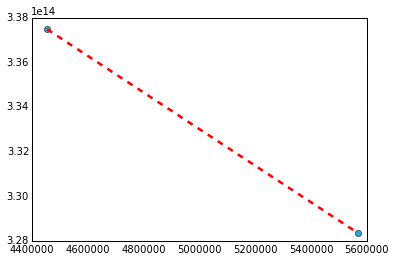

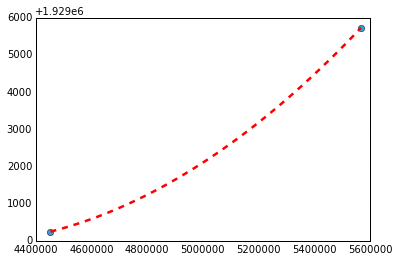

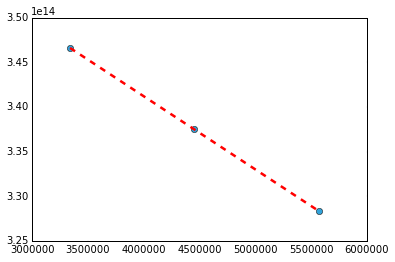

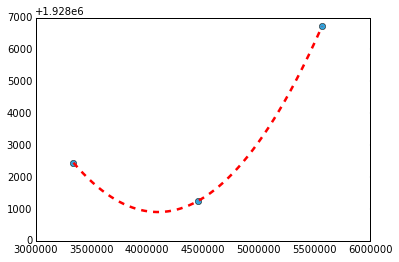

In [27]:
# Can we really generalise from just two datapoints?
st = '-36810'
li = np.any(np.concatenate((
            np.expand_dims(sublog['uid1'].values==st,1),
            np.expand_dims(sublog['uid2'].values==st,1)
        ),axis=1),axis=1)
y = sublog[li]['RMSE'].values
if np.any(np.isclose(y,RMSE_baseline)):
    print('uid {} is not in public test'.format(st))
factors = sublog[li]['factor'].values
x = np.array([pred_dict[f] for f in factors])
x = np.append(x, pred_100)
y = np.append(y, RMSE_baseline)

# Redact x and y
x = x[1:]
y = y[1:]

z, residuals, rank, singular_values, rcond = np.polyfit(x, y**2*n_pub-x**2, 1, full=True)
p = np.poly1d(z)

x0 = -0.5 * z[0]
c = z[1] - x0**2
print('uid = ',st)
print('x0 = ',x0)
print('{},{}'.format(st,x0))
print('c  = ',c)
print('res = ',residuals)

plt.plot(x,y**2*n_pub-x**2,'o')
xx = np.linspace(x.min(), x.max(), num=1000)
plt.plot(xx,p(xx),'--',color='r')
plt.show()

plt.plot(x,y,'o')
plt.plot(xx,((p(xx) + xx**2)/n_pub)**0.5,'--',color='r')
plt.show()


# add back in
x = np.array([pred_dict[f] for f in factors])
x = np.append(x, pred_100)
y = sublog[li]['RMSE'].values
y = np.append(y, RMSE_baseline)

# Don't refit the model! Just plot!

plt.plot(x,y**2*n_pub-x**2,'o')
xx = np.linspace(x.min(), x.max(), num=1000)
plt.plot(xx,p(xx),'--',color='r')
plt.show()

plt.plot(x,y,'o')
plt.plot(xx,((p(xx) + xx**2)/n_pub)**0.5,'--',color='r')
plt.show()

Yes, we can generalise from only the common datapoint, plus one general datapoint.

The change in the estimated true revenue was 0.001, which is negligible.
```
-36810,4097082.000192844
-36810,4097082.001251276
```

uid =  -31652
x0 =  5216723.99991
-31652,5216723.999912177
c  =  3.5672826294e+14
res =  [ 279440.26075745]


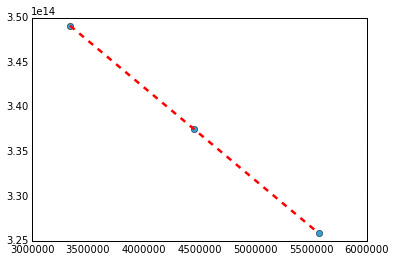

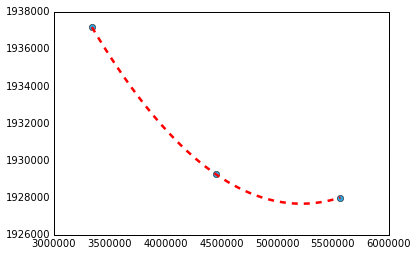

In [44]:
st = '-31652'
# Automated method. Blindly uses all available records.
li = np.any(np.concatenate((
            np.expand_dims(sublog['uid1'].values==st,1),
            np.expand_dims(sublog['uid2'].values==st,1)
        ),axis=1),axis=1)
y = sublog[li]['RMSE'].values
if np.any(np.isclose(y,RMSE_baseline)):
    print('!!!')
    print('uid {} is not in public test'.format(st))
    print('!!!')
factors = sublog[li]['factor'].values
x = np.array([pred_dict[f] for f in factors])
x = np.append(x, pred_100)
y = np.append(y, RMSE_baseline)

z, residuals, rank, singular_values, rcond = np.polyfit(x, y**2*n_pub-x**2, 1, full=True)
p = np.poly1d(z)

x0 = -0.5 * z[0]
c = z[1] - x0**2
print('uid = ',st)
print('x0 = ',x0)
print('{},{}'.format(st,x0))
print('c  = ',c)
print('res = ',residuals)

plt.plot(x,y**2*n_pub-x**2,'o')
xx = np.linspace(x.min(), x.max(), num=1000)
plt.plot(xx,p(xx),'--',color='r')
plt.show()

plt.plot(x,y,'o')
plt.plot(xx,((p(xx) + xx**2)/n_pub)**0.5,'--',color='r')
plt.show()

In [34]:
# Need to be able to find a datapoint from only some of its records
st = '-26946'
li = np.any(np.concatenate((
            np.expand_dims(sublog['uid1'].values==st,1),
            np.expand_dims(sublog['uid2'].values==st,1)
        ),axis=1),axis=1)
print(sublog[li])

             RMSE  factor    uid1  uid2           label
82  1922605.98097    0.75  -26946  -756  58th and 117th
83  1921932.69521    0.50  -26946  None  58th and 117th


             RMSE  factor    uid1  uid2           label
83  1921932.69521     0.5  -26946  None  58th and 117th
[ 1921932.69521]
uid =  -26946
x0 =  2733103.99998
-26946,2733103.999976956
c  =  3.54350849486e+14
res =  []


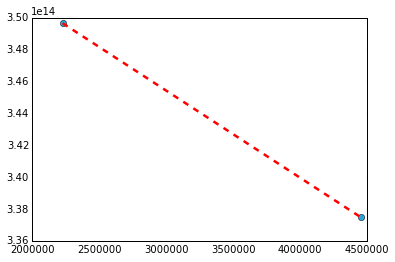

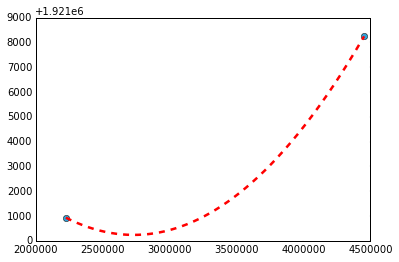

In [36]:
# Need to be able to find a datapoint from only some of its records
st = '-26946'

locs = [83]

print(sublog.iloc[locs])

if np.any(sublog.iloc[locs]['uid1'].values!=st and sublog.iloc[locs]['uid2'].values!=st):
    print('!!!')
    print('uid {} is not found in all the listed records'.format(st))
    print('!!!')

y = sublog.iloc[locs]['RMSE'].values
print(y)
if np.any(np.isclose(y,RMSE_baseline)):
    print('!!!')
    print('uid {} is not in public test'.format(st))
    print('!!!')
factors = sublog.iloc[locs]['factor'].values
x = np.array([pred_dict[f] for f in factors])
x = np.append(x, pred_100)
y = np.append(y, RMSE_baseline)

z, residuals, rank, singular_values, rcond = np.polyfit(x, y**2*n_pub-x**2, 1, full=True)
p = np.poly1d(z)

x0 = -0.5 * z[0]
c = z[1] - x0**2
print('uid = ',st)
print('x0 = ',x0)
print('{},{}'.format(st,x0))
print('c  = ',c)
print('res = ',residuals)

plt.plot(x,y**2*n_pub-x**2,'o')
xx = np.linspace(x.min(), x.max(), num=1000)
plt.plot(xx,p(xx),'--',color='r')
plt.show()

plt.plot(x,y,'o')
plt.plot(xx,((p(xx) + xx**2)/n_pub)**0.5,'--',color='r')
plt.show()

If we only changed an ID with another ID (but we know the actual revenue for the second one) we need to fit

y^2 = ( c + (x-x0)^2 )/n

where c = c' + (t-t0)^2.

n.y^2 - x^2 = - 2.x0.x + (x0^2 + c' + (t-t0)^2)

But since t is not constant,

n.y^2 - x^2 - (t-t0)^2 = - 2.x0.x + (x0^2 + c')

uid =  -756
x0 =  3958080.99881
-756,3958080.998809036
c  =  3.54105377197e+14
res =  []


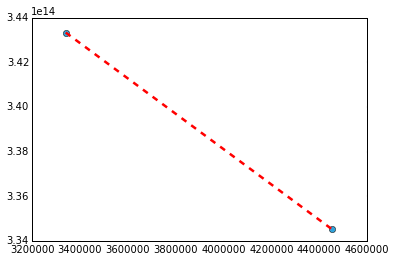

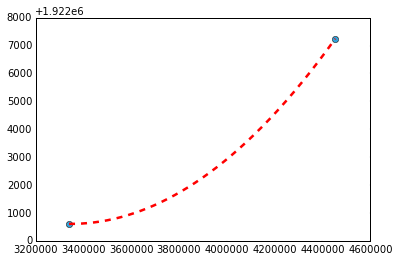

In [39]:
# Need to be able to find a datapoint which only changes with another datapoint
st = '-756'

#t0 = 3672426.9993131235 # true value for '-2679'
#t0 = 4690137.001184127 # true value for '-37719'
#t0 = 6285388.000239364 # true value for '-4612'
t0 = 2733103.999976956 # true value for '-26946'

li = np.any(np.concatenate((
            np.expand_dims(sublog['uid1'].values==st,1),
            np.expand_dims(sublog['uid2'].values==st,1)
        ),axis=1),axis=1)
y = sublog[li]['RMSE'].values
if np.any(np.isclose(y,RMSE_baseline)):
    print('!!!')
    print('uid {} is not in public test'.format(st))
    print('!!!')

factors = sublog[li]['factor'].values
x = np.array([pred_dict[f] for f in factors])
x = np.append(x, pred_100)
y = np.append(y, RMSE_baseline)
t = x

z, residuals, rank, singular_values, rcond = np.polyfit(x, y**2*n_pub-x**2-(t-t0)**2, 1, full=True)
p = np.poly1d(z)

x0 = -0.5 * z[0]
c = z[1] - x0**2
print('uid = ',st)
print('x0 = ',x0)
print('{},{}'.format(st,x0))
print('c  = ',c)
print('res = ',residuals)

plt.plot(x,y**2*n_pub-x**2-(t-t0)**2,'o')
xx = np.linspace(x.min(), x.max(), num=1000)
plt.plot(xx,p(xx),'--',color='r')
plt.show()

plt.plot(x,y,'o')
plt.plot(xx,((p(xx) + xx**2 + (xx-t0)**2)/n_pub)**0.5,'--',color='r')
plt.show()

In [43]:
# Need to be able to find a datapoint which only changes with another datapoint
st1 = '-756'
t1 = 3958080.998809036

st0 = '-26946'
t0 = 2733103.999976956 # true value for '-26946'

st = st0

li = np.any(np.concatenate((
            np.expand_dims(sublog['uid1'].values==st0,1),
            np.expand_dims(sublog['uid2'].values==st0,1),
            np.expand_dims(sublog['uid1'].values==st1,1),
            np.expand_dims(sublog['uid2'].values==st1,1)
        ),axis=1),axis=1)
y = sublog[li]['RMSE'].values
if np.any(np.isclose(y,RMSE_baseline)):
    print('!!!')
    print('uid {} is not in public test'.format(st))
    print('!!!')

factors = sublog[li]['factor'].values
x = np.array([pred_dict[f] for f in factors])

uselog = sublog[li]

li0 = np.any(np.concatenate((
            np.expand_dims(uselog['uid1'].values==st0,1),
            np.expand_dims(uselog['uid2'].values==st0,1)
        ),axis=1),axis=1)
li1 = np.any(np.concatenate((
            np.expand_dims(uselog['uid1'].values==st1,1),
            np.expand_dims(uselog['uid2'].values==st1,1)
        ),axis=1),axis=1)

x0 = pred_100 * np.ones(len(x))
x0[li0] = x[li0]
x1 = pred_100 * np.ones(len(x))
x1[li1] = x[li1]

x0 = np.append(x0, pred_100)
x1 = np.append(x1, pred_100)
y = np.append(y, RMSE_baseline)

totSE  = y**2*n_pub
predSE = (x0-t0)**2 + (x1-t1)**2

offset = np.mean(totSE - predSE)

predRMSE = np.sqrt((predSE + offset)/n_pub)

print('uid0 = ',st0)
print('uid1 = ',st1)
print('c  = ',offset)

print(y)
print(predRMSE)


uid0 =  -26946
uid1 =  -756
c  =  3.54105377197e+14
[ 1922605.98097  1921932.69521  1929245.11374]
[ 1922605.98097  1921932.69521  1929245.11374]


uid =  -2679
x0 =  3672426.99931
-2679,3672426.999313178
c  =  3.55516884738e+14
res =  [  8.40706385e+24]


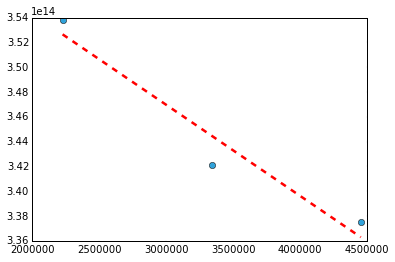

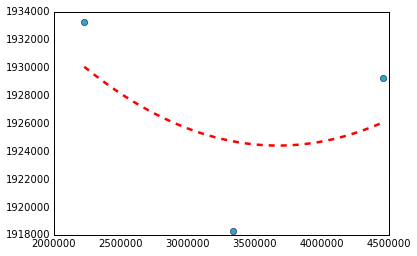

In [32]:
st = '-2679'
# This is what things look like when they go wrong
li = np.any(np.concatenate((
            np.expand_dims(sublog['uid1'].values==st,1),
            np.expand_dims(sublog['uid2'].values==st,1)
        ),axis=1),axis=1)
y = sublog[li]['RMSE'].values
if np.any(np.isclose(y,RMSE_baseline)):
    print('uid {} is not in public test'.format(st))
factors = sublog[li]['factor'].values
x = np.array([pred_dict[f] for f in factors])
x = np.append(x, pred_100)
y = np.append(y, RMSE_baseline)

z, residuals, rank, singular_values, rcond = np.polyfit(x, y**2*n_pub-x**2, 1, full=True)
p = np.poly1d(z)

x0 = -0.5 * z[0]
c = z[1] - x0**2
print('uid = ',st)
print('x0 = ',x0)
print('{},{}'.format(st,x0))
print('c  = ',c)
print('res = ',residuals)

plt.plot(x,y**2*n_pub-x**2,'o')
xx = np.linspace(x.min(), x.max(), num=1000)
plt.plot(xx,p(xx),'--',color='r')
plt.show()

plt.plot(x,y,'o')
plt.plot(xx,((p(xx) + xx**2)/n_pub)**0.5,'--',color='r')
plt.show()

residual is 8.4e+24 instead of 3703279.27758789 = 3.7e+6

Idea for fully automated method:
- Look for the uids which coincide with no change: these are redundant
- Look for uids which occur with None or with redundant datapoints only.
- Try to fit with all datapoints.
    - If redundancy is low, mark all other partners as private
    - If residual is too high, reduce to only-me datapoints and fit again
- Look for uids which occur only with a target-known uid
- Fit by considering the effect of partners
- Repeat until no uids remain, or a loop yields no new labels

uid =  -8121
x0 =  1077976.99987
-8121,1077976.9998665557
c  =  3.21935024206e+14
res =  [ 3634988.52056885]


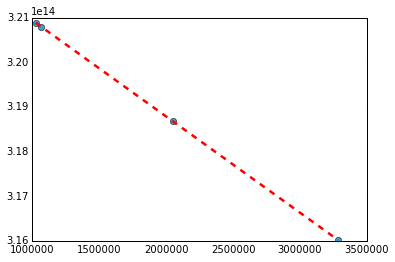

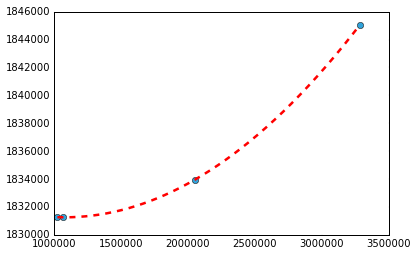

In [46]:
st = '-8121'

y = [1831253.84415, 1831261.28298, 1833950.85712, 1845036.17820]
x = [1069179.3511274334, 1026083.8302566538, 2052167.6605133077, 3283468.2568212925]

y = np.asarray(y)
x = np.asarray(x)

z, residuals, rank, singular_values, rcond = np.polyfit(x, y**2*n_pub-x**2, 1, full=True)
p = np.poly1d(z)

x0 = -0.5 * z[0]
c = z[1] - x0**2
print('uid = ',st)
print('x0 = ',x0)
print('{},{}'.format(st,x0))
print('c  = ',c)
print('res = ',residuals)

plt.plot(x,y**2*n_pub-x**2,'o')
xx = np.linspace(x.min(), x.max(), num=1000)
plt.plot(xx,p(xx),'--',color='r')
plt.show()

plt.plot(x,y,'o')
plt.plot(xx,((p(xx) + xx**2)/n_pub)**0.5,'--',color='r')
plt.show()